# Basic notebook for benchmarking tribus results

## Imports

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

## Read files

In [30]:
sample_file = pd.read_csv('/Users/ftedo/Documents/Summer_Internship_2022/tribus/input_data/53768.csv')
cell_type_description = pd.read_excel('/Users/ftedo/Documents/Summer_Internship_2022/tribus/gate_logic.xlsx')
labels = pd.read_csv('/Users/ftedo/Documents/Summer_Internship_2022/tribus/tribus_results/2022-06-01_14-34/labels_53768.csv')

In [38]:
markers = cell_type_description['Marker']
all_markers = list(sample_file.columns)[4:-11]
filtered_sample_data = sample_file[markers]
filtered_sample_data['labels'] = labels
sample_file['labels'] = labels

/var/folders/72/g5z28hn52b9ctj3tj0b7xp0c0000gn/T/ipykernel_25834/904969563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sample_data['labels'] = labels


In [81]:
#subsetting by cell types
subsets_all_marker = []
subsets_filtered = []
cell_types = list(np.unique(labels))
for cell_type in cell_types:
    subsets_all_marker.append(sample_file.loc[sample_file['labels'] == cell_type])
    subsets_filtered.append(filtered_sample_data.loc[filtered_sample_data['labels'] == cell_type])

## Correlation matrices

In [ ]:
whole_sample_corr_mx = pd.DataFrame()
for marker1 in all_markers:
    correlations = []
    for marker2 in all_markers:
        correlations.append(np.corrcoef(list(sample_file[marker1]),list(sample_file[marker2]))[0, 1])
    whole_sample_corr_mx[marker1] = correlations
whole_sample_corr_mx.index = all_markers

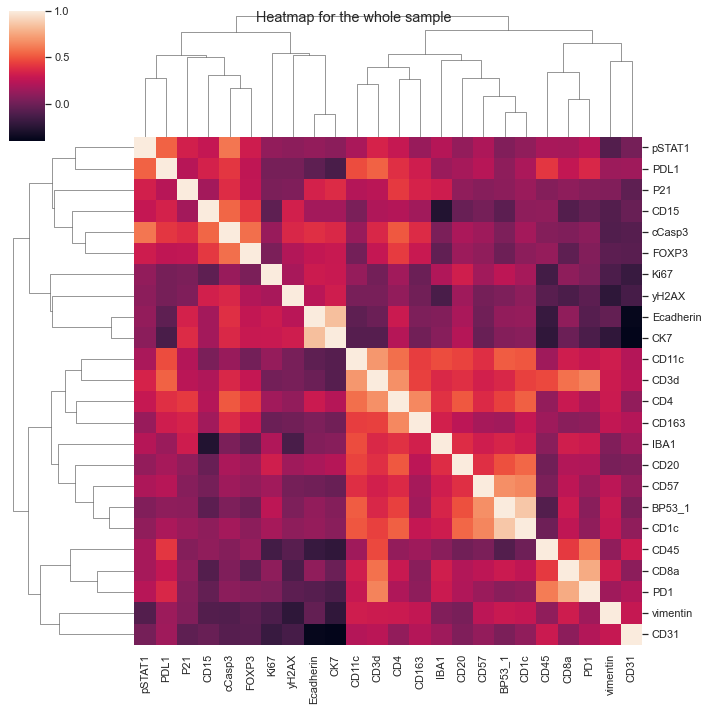

In [86]:
clustermap_whole = sns.clustermap(whole_sample_corr_mx, figsize=(10, 10)).fig.suptitle('Heatmap for the whole sample')

In [76]:
corr_matrices = []
for table in  subsets_all_marker:
    corr_mx = pd.DataFrame()
    for marker1 in all_markers:
        correlations = []
        for marker2 in all_markers:
            correlations.append(np.corrcoef(list(table[marker1]),list(table[marker2]))[0, 1])
        corr_mx[marker1] = correlations
    corr_mx.index = all_markers
    corr_matrices.append(corr_mx)

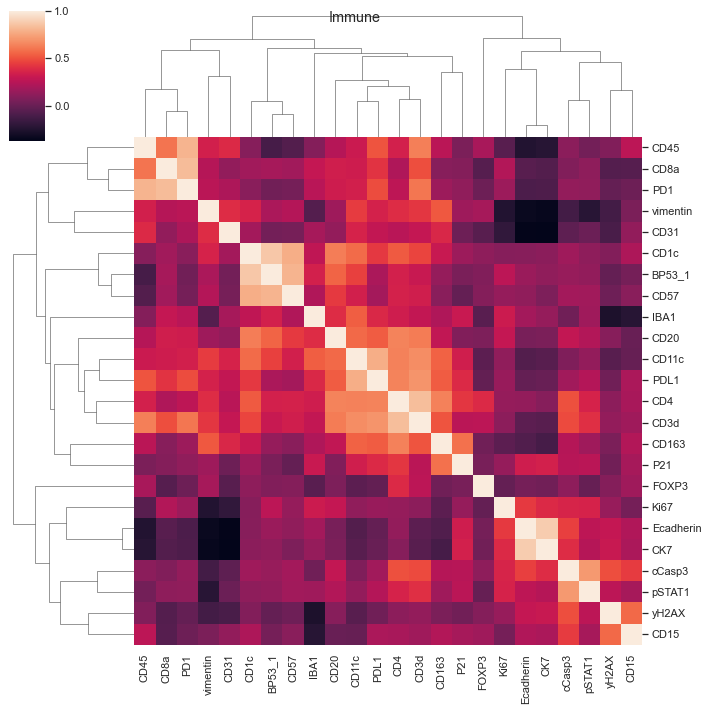

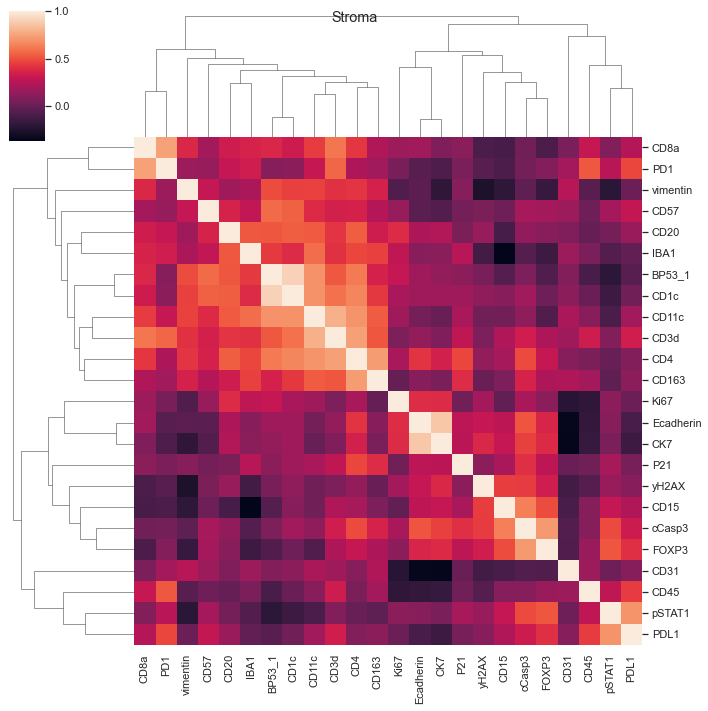

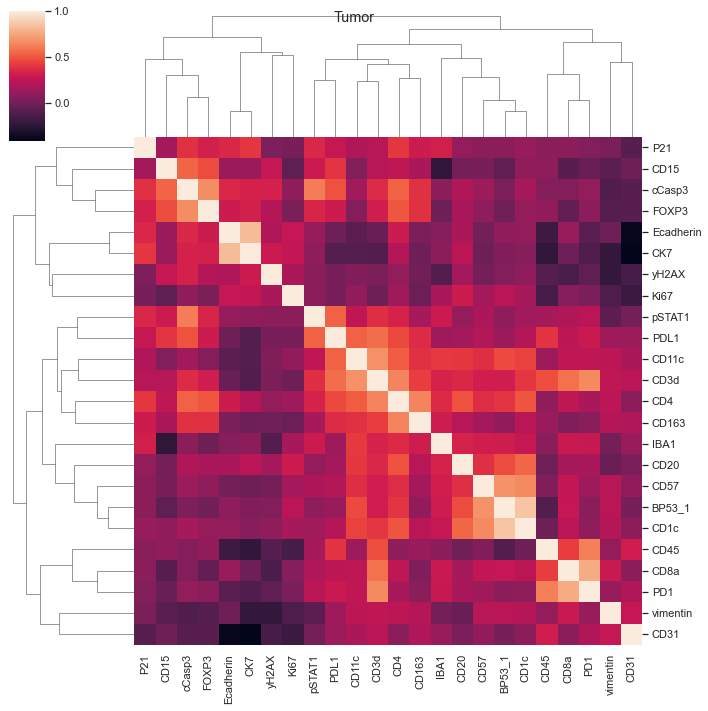

In [87]:
for i in range(len(corr_matrices)):
    clustermap= sns.clustermap(corr_matrices[i], figsize=(10, 10)).fig.suptitle(cell_types[i])